In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    VotingRegressor,
)
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [4]:
df = pd.read_csv(
    "c:\\Users\\Jasmeen Pabla\\Downloads\\house-prices-advanced-regression-techniques\\train.csv")

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
summary_stats = df.describe()
summary_stats

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
missing_values = df.isnull().sum()
missing_values

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

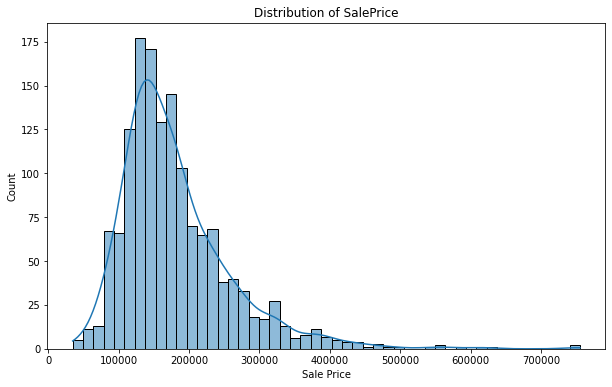

In [9]:
# Visualize the distribution of 'SalePrice'
plt.figure(figsize=(10, 6))
sns.histplot(df["SalePrice"], kde=True)
plt.title("Distribution of SalePrice")
plt.xlabel("Sale Price")
plt.show()

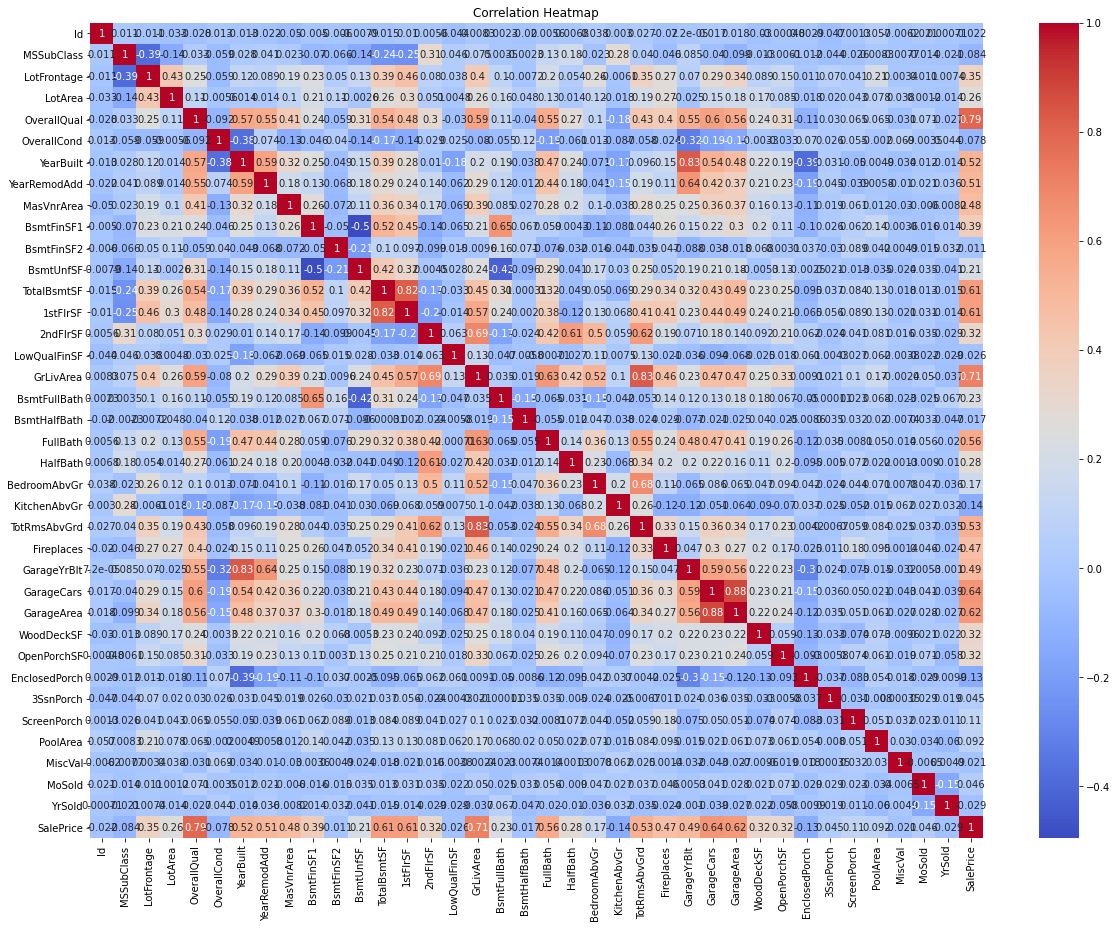

In [10]:
# Correlation heatmap for numerical features
numerical_features = df.select_dtypes(include=["int64", "float64"])
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

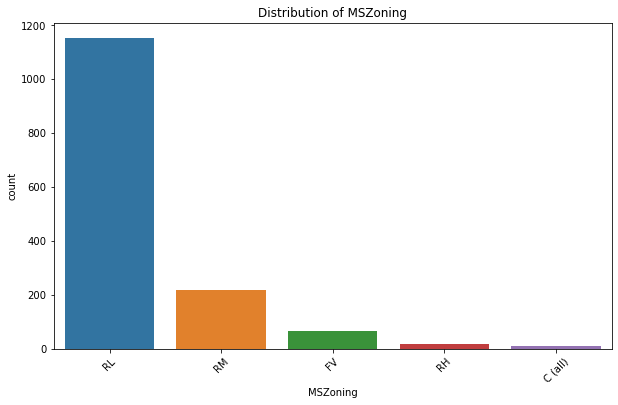

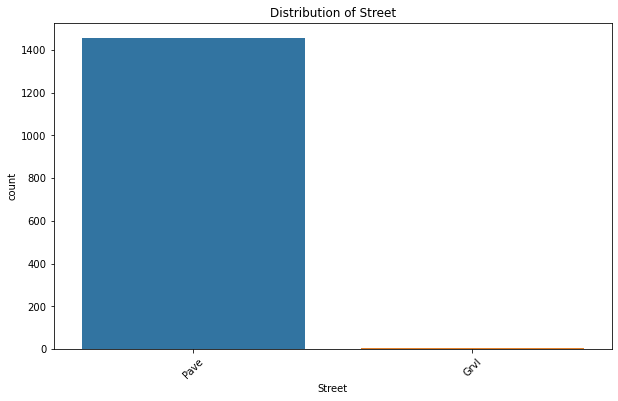

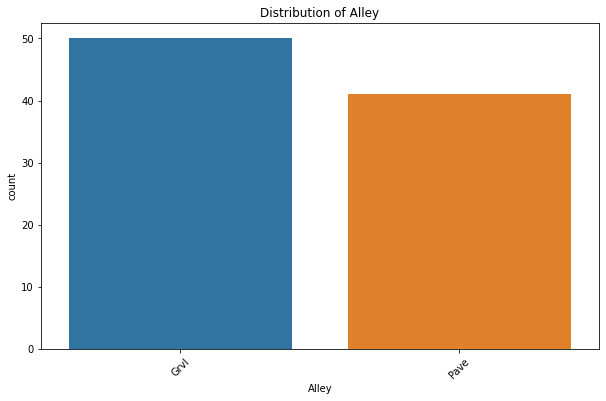

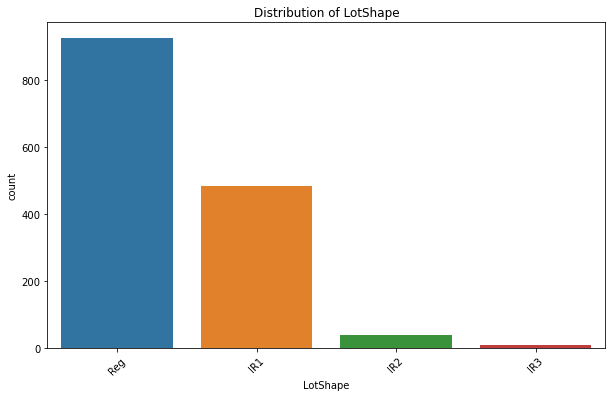

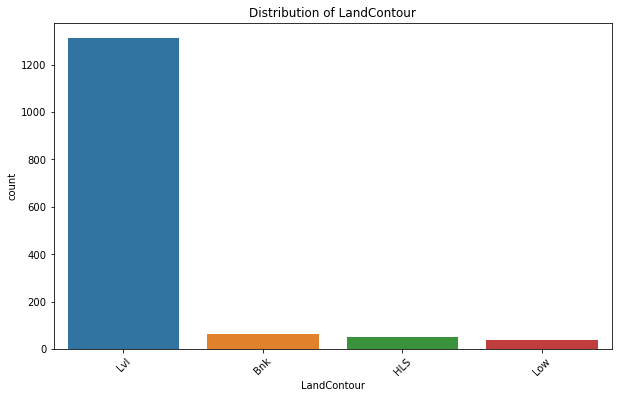

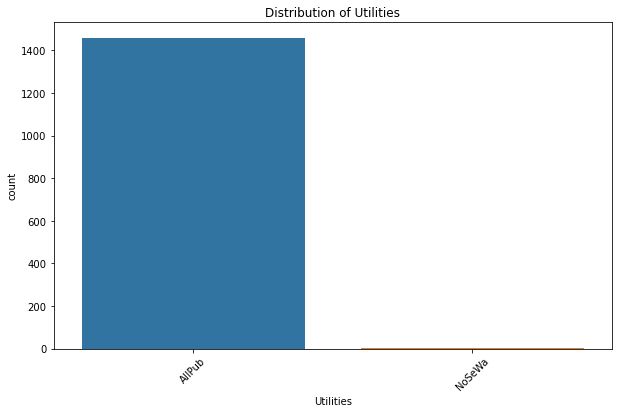

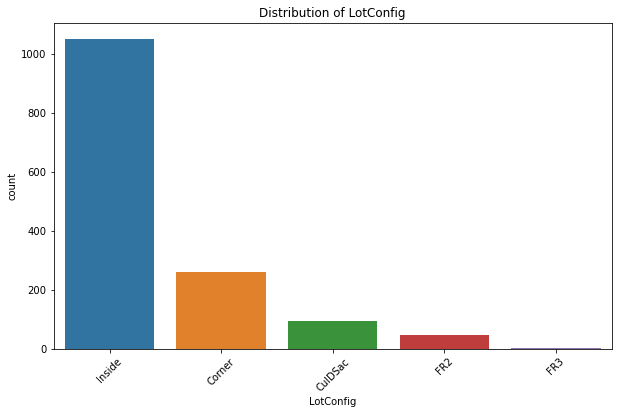

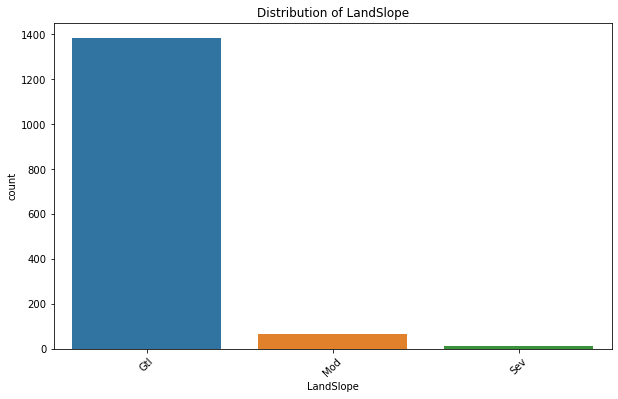

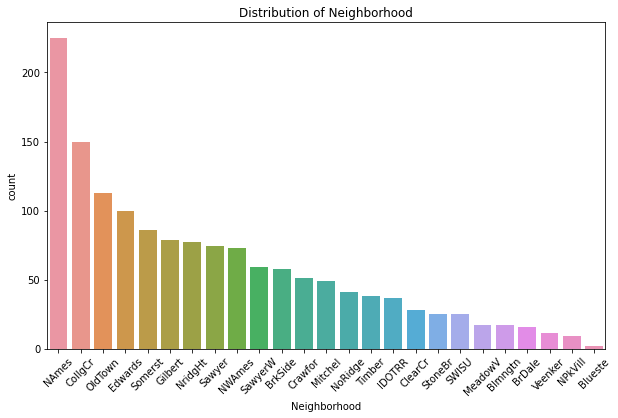

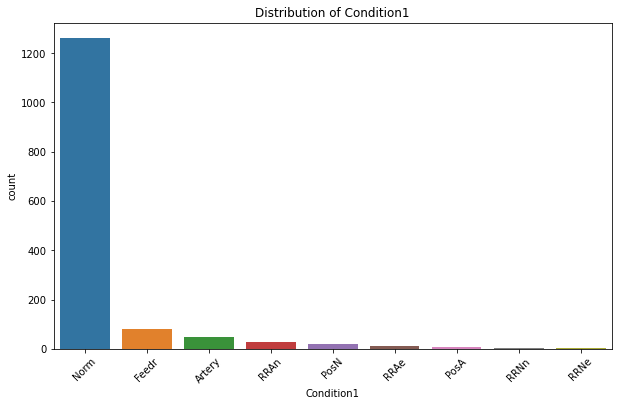

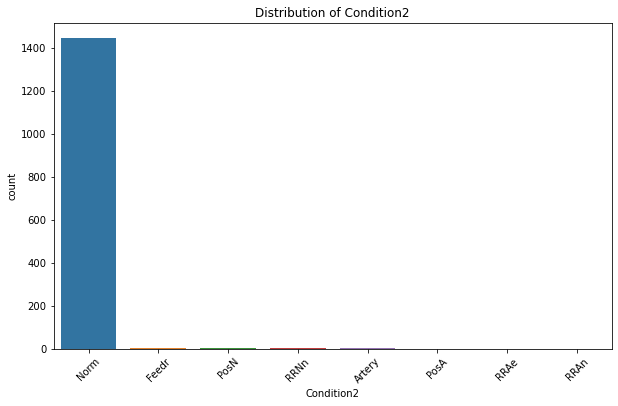

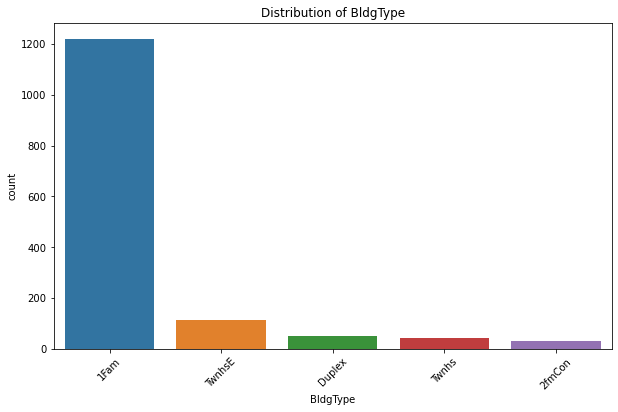

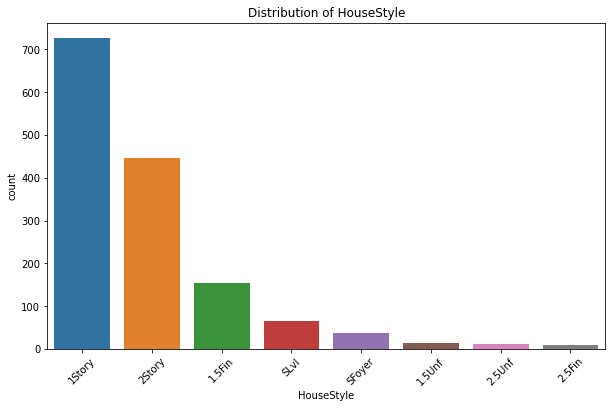

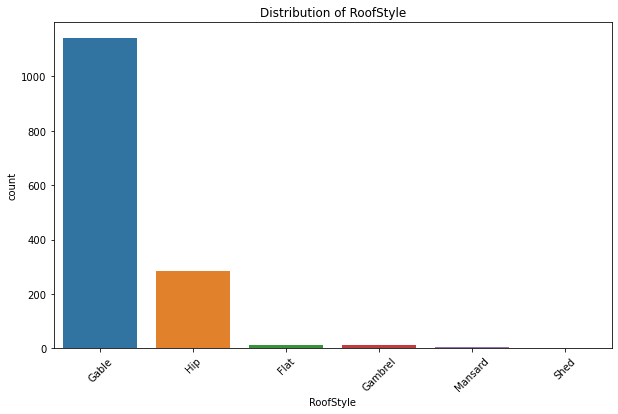

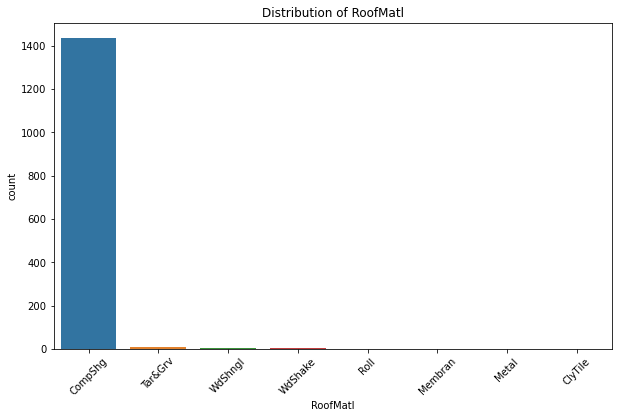

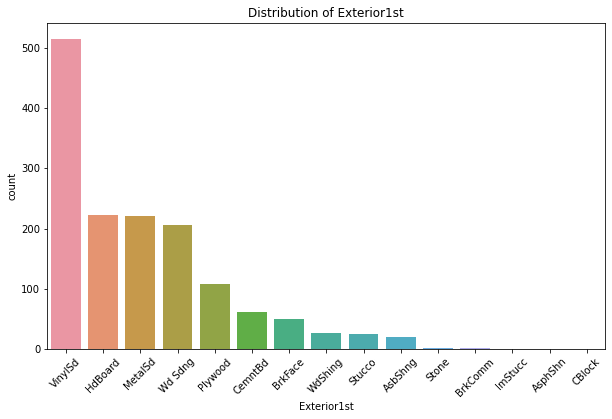

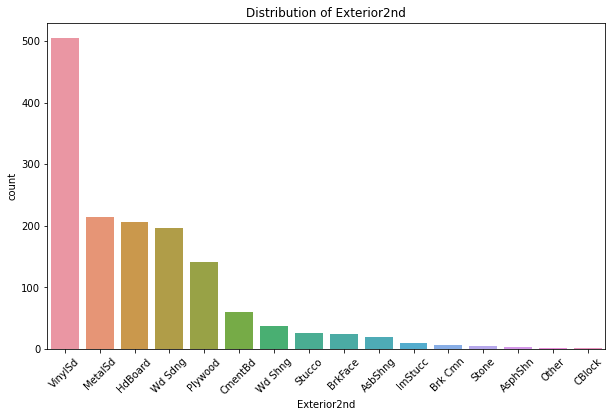

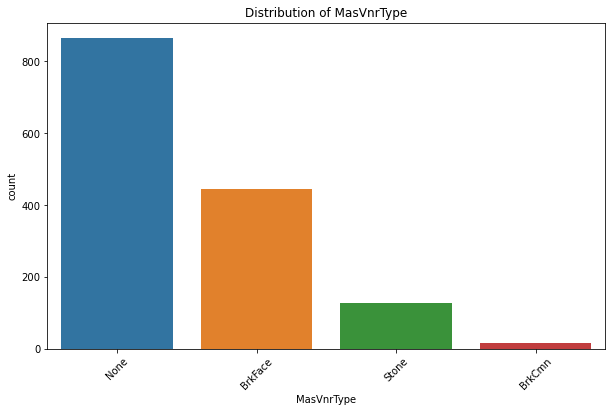

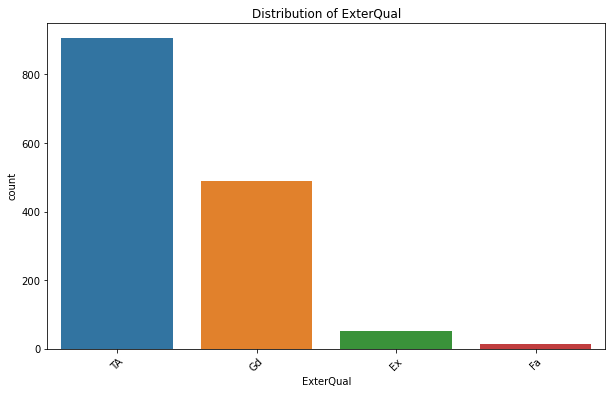

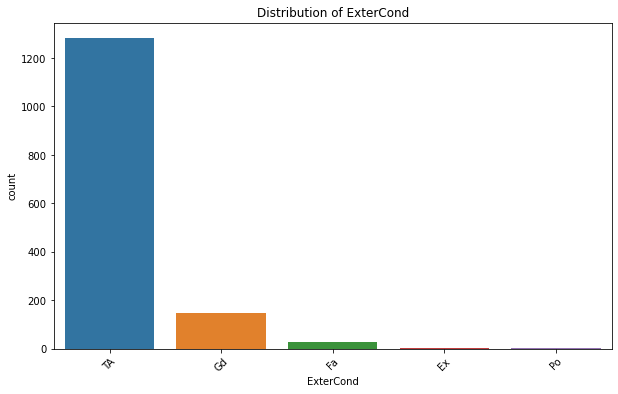

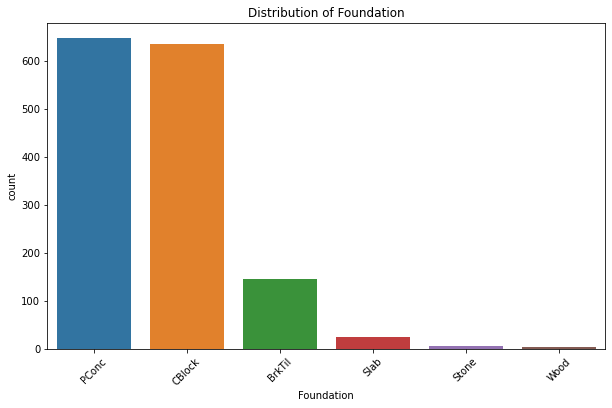

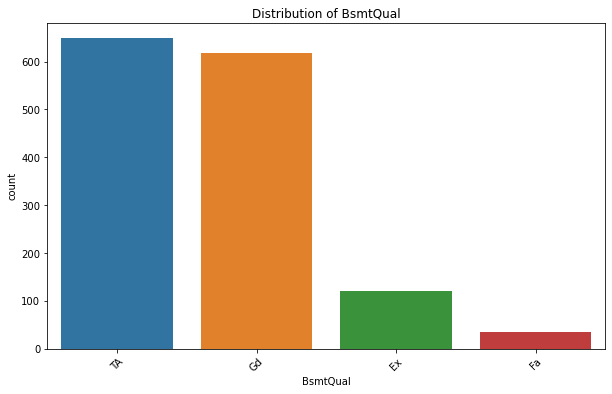

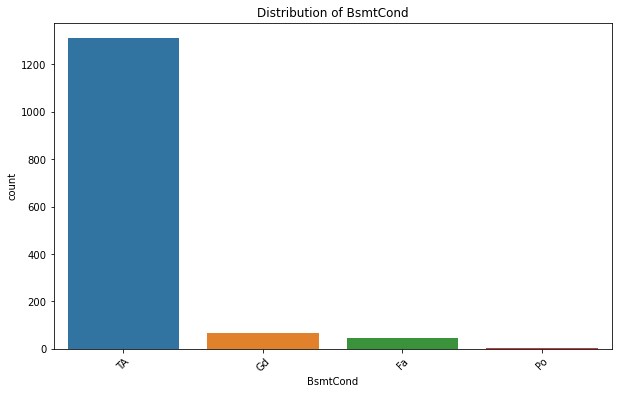

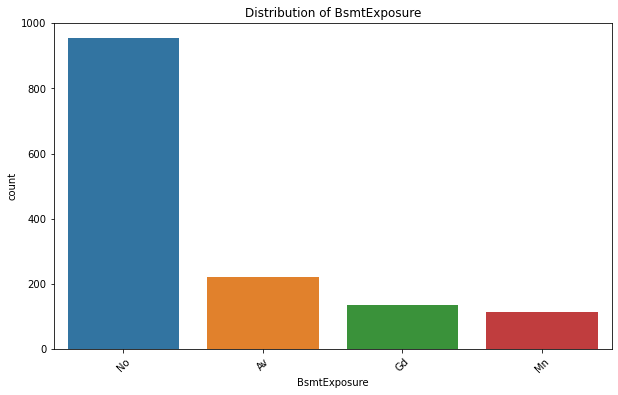

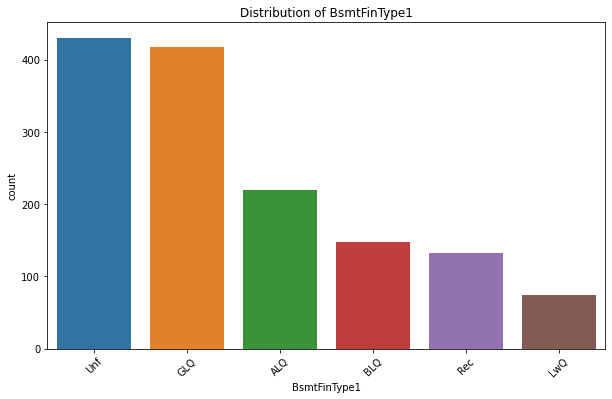

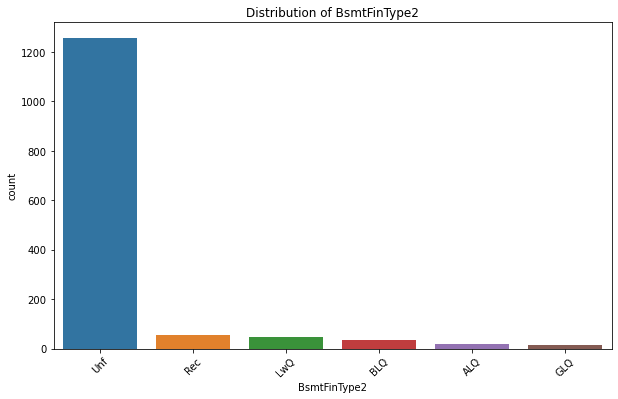

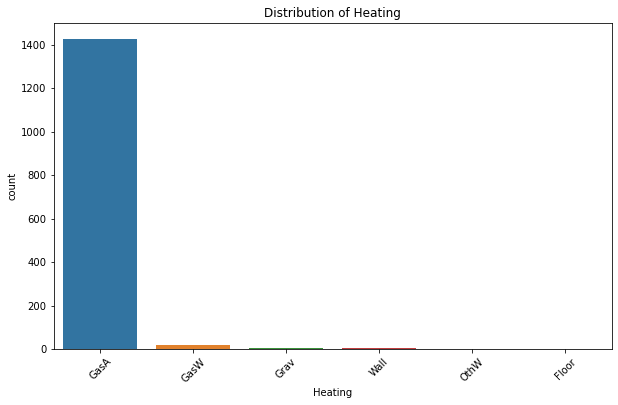

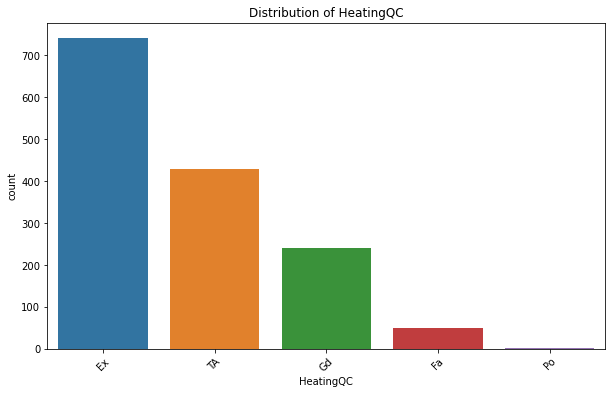

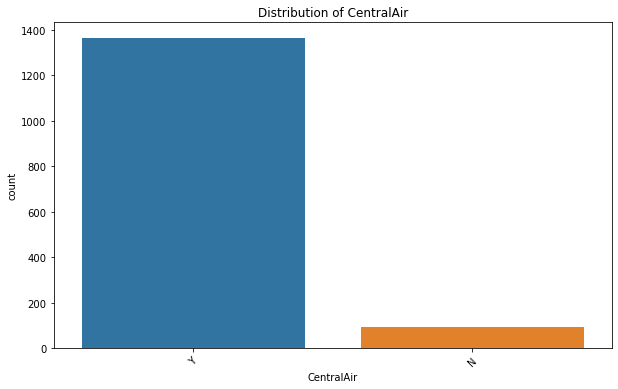

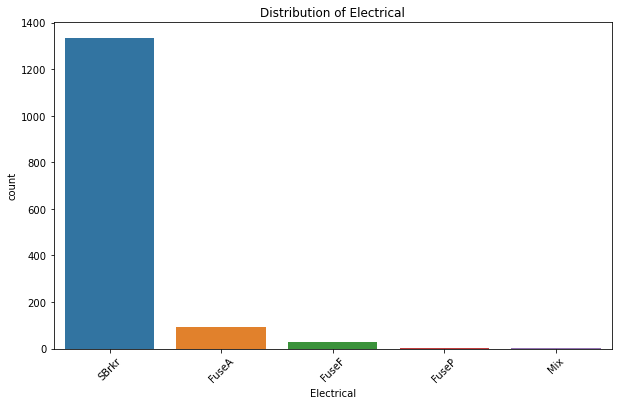

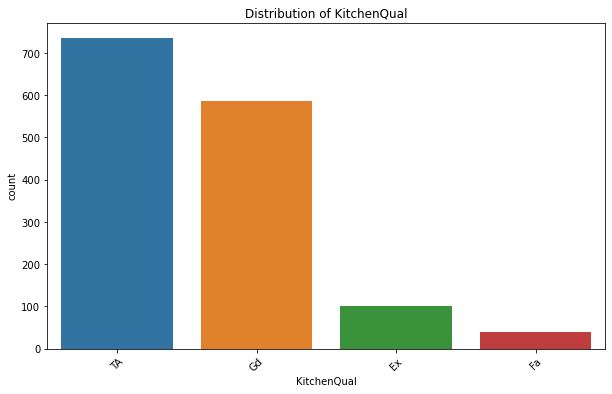

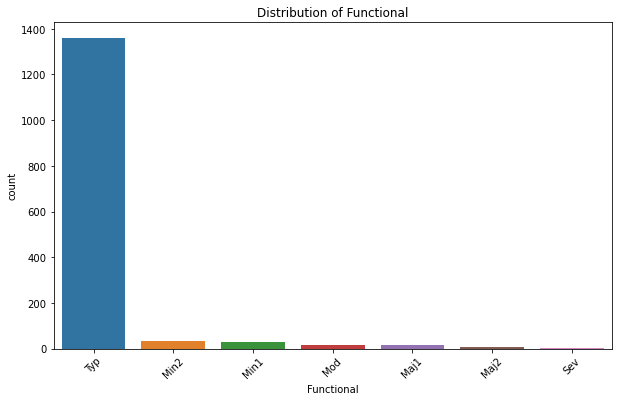

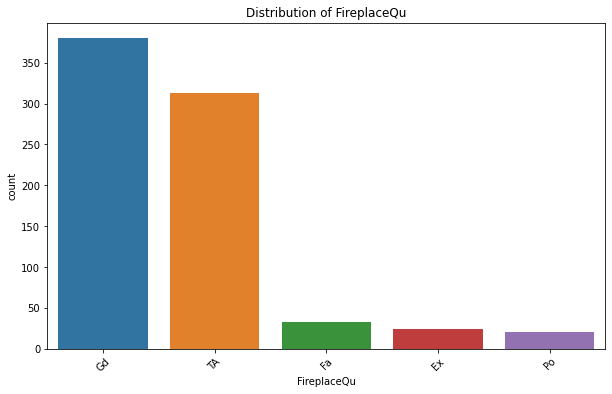

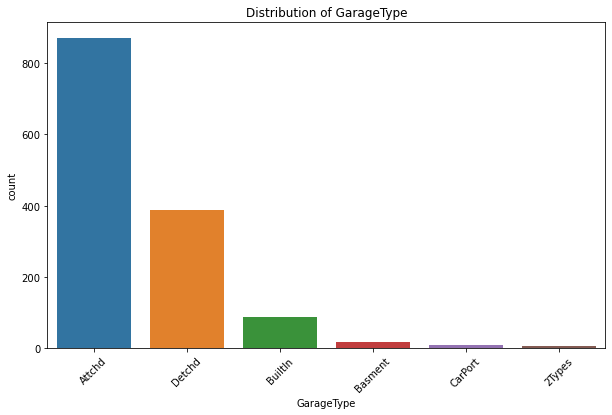

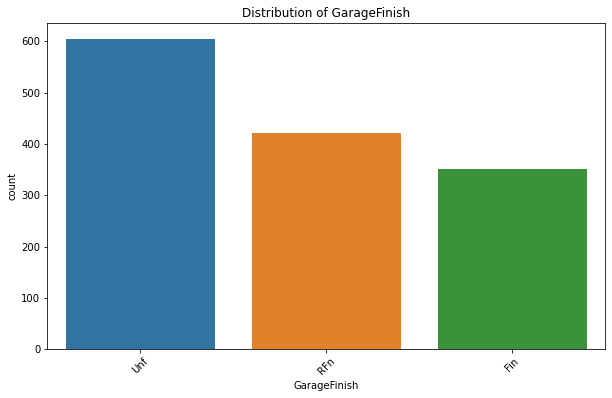

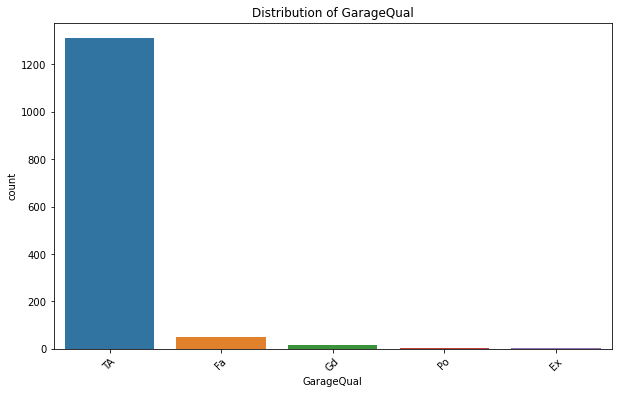

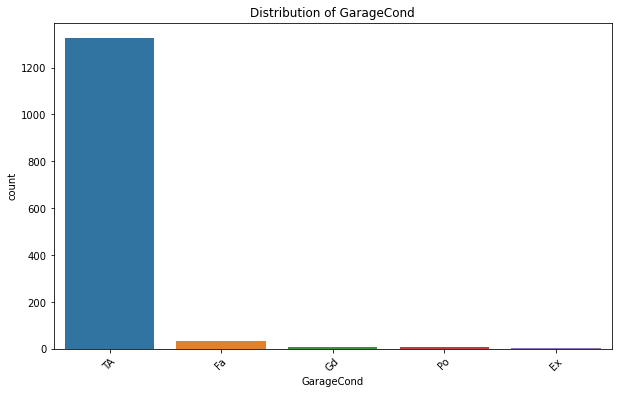

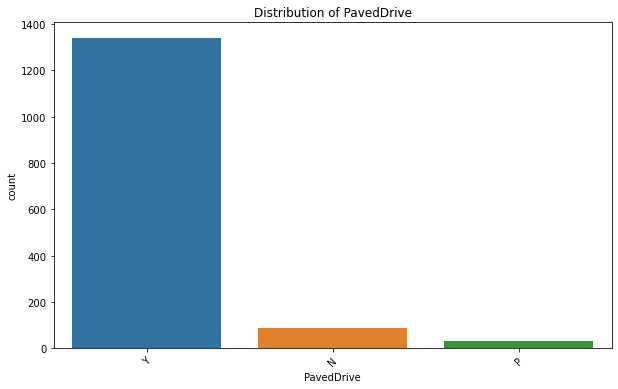

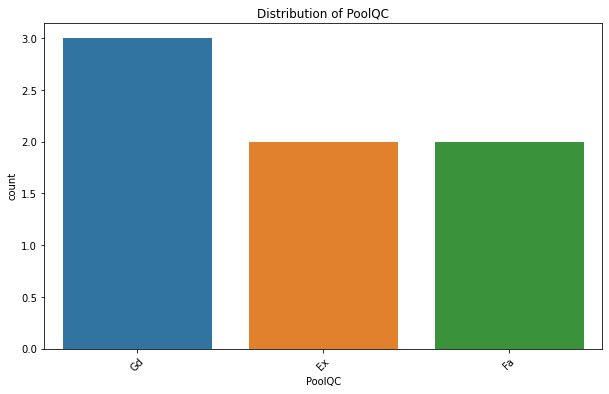

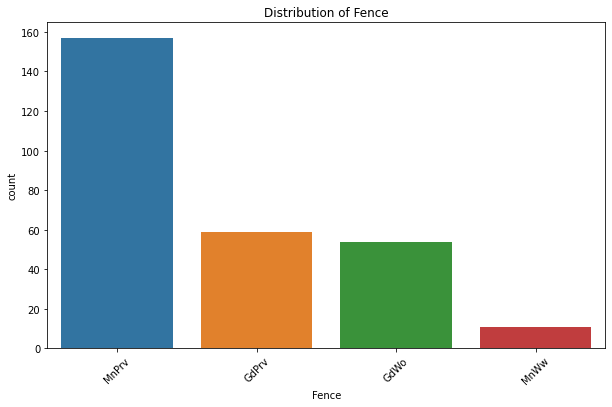

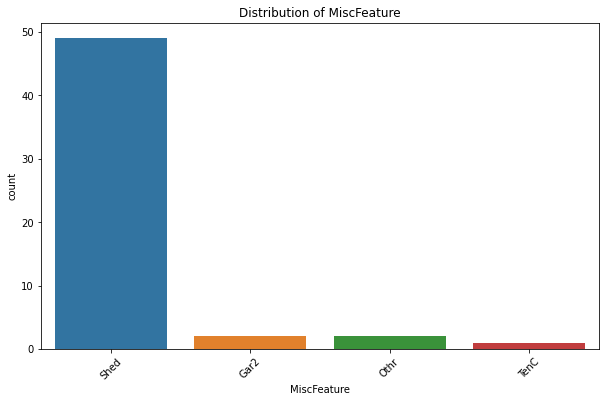

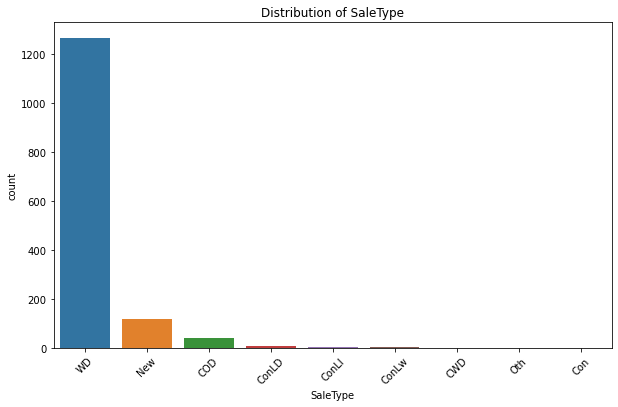

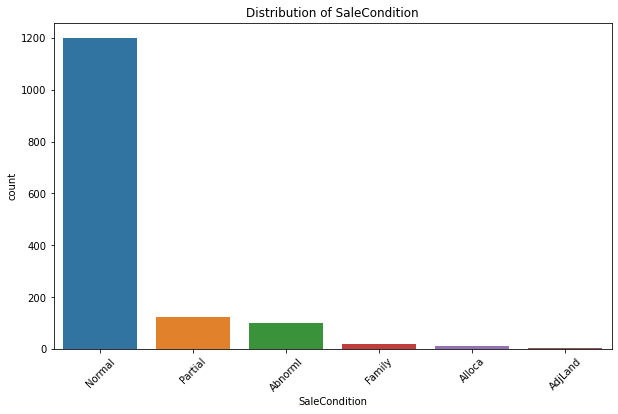

In [11]:
# Visualize some categorical features
categorical_features = df.select_dtypes(include="object")
for column in categorical_features.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column, order=df[column].value_counts().index)
    plt.title(f"Distribution of {column}")
    plt.xticks(rotation=45)
    plt.show()

In [12]:
# Drop columns with too many missing values (more than 30% missing)
threshold = 0.3
df = df.dropna(thresh=len(df) * threshold, axis=1)

In [13]:
# Separate features (X) and target (y)
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [15]:
# Define preprocessing steps for numerical and categorical features
numeric_features = X_train.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X_train.select_dtypes(include="object").columns

In [16]:
numeric_transformer = Pipeline(
    [("imputer", SimpleImputer(strategy="mean")), ("scaler", StandardScaler())]
)

In [17]:
categorical_transformer = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

In [18]:
# Apply transformations to the appropriate columns using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [19]:
model = Pipeline([("preprocessor", preprocessor),
                 ("regressor", LinearRegression())])

In [20]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF'...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageF

In [21]:
test_score = model.score(X_test, y_test)
print(f"R-squared score on test data: {test_score:.2f}")

R-squared score on test data: 0.88


In [22]:
models = [
    ("Linear Regression", LinearRegression()),
    ("Random Forest", RandomForestRegressor(n_estimators=100, random_state=42)),
    ("Support Vector Machine", SVR(kernel="linear")),
    ("Gradient Boosting", GradientBoostingRegressor(n_estimators=100, random_state=42)),
]

In [ ]:
# Evaluate models
for model_name, model in models:
    pipeline = Pipeline([("preprocessor", preprocessor), ("model", model)])

    # Cross-validation for model evaluation
    scores = cross_val_score(
        pipeline, X_train, y_train, cv=5, scoring="neg_mean_squared_error"
    )
    rmse_scores = np.sqrt(-scores)
    r2_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring="r2")

    print(f"Model: {model_name}")
    print(f"RMSE: {rmse_scores.mean():.2f} (std: {rmse_scores.std():.2f})")
    print(f"R-squared: {r2_scores.mean():.2f} (std: {r2_scores.std():.2f})")
    print()

Model: Linear Regression
RMSE: 37042.11 (std: 8871.93)
R-squared: 0.76 (std: 0.10)



In [ ]:
ensemble_model = VotingRegressor(
    estimators=[
        (
            "lr",
            Pipeline([("preprocessor", preprocessor), ("model", LinearRegression())]),
        ),
        (
            "rf",
            Pipeline(
                [
                    ("preprocessor", preprocessor),
                    ("model", RandomForestRegressor(n_estimators=100, random_state=42)),
                ]
            ),
        ),
        (
            "svr",
            Pipeline([("preprocessor", preprocessor), ("model", SVR(kernel="linear"))]),
        ),
        (
            "gb",
            Pipeline(
                [
                    ("preprocessor", preprocessor),
                    (
                        "model",
                        GradientBoostingRegressor(n_estimators=100, random_state=42),
                    ),
                ]
            ),
        ),
    ]
)

In [ ]:
# Fit the ensemble model and evaluate it on the test data
ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_test)

test_rmse_ensemble = np.sqrt(mean_squared_error(y_test, y_pred_ensemble))
test_r2_ensemble = r2_score(y_test, y_pred_ensemble)

print("Ensemble Model (VotingRegressor) Evaluation on Test Data:")
print(f"Test RMSE: {test_rmse_ensemble:.2f}")
print(f"Test R-squared: {test_r2_ensemble:.2f}")

In [ ]:
# Fit the final model and evaluate it on the test data
final_model = Pipeline(
    [
        ("preprocessor", preprocessor),
        # Replace with your best-performing model
        ("model", GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ]
)

In [ ]:
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_r2 = r2_score(y_test, y_pred)

print("Final Model Evaluation on Test Data:")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Test R-squared: {test_r2:.2f}")

### GET FEATURE IMPORTANCE OF THE MODEL

In [ ]:
gb_model = final_model.named_steps["model"]
importances = gb_model.feature_importances_

In [ ]:
numeric_features_transformed = numeric_features

In [ ]:
cat_pipeline = final_model.named_steps['preprocessor'].named_transformers_[
    'cat']

In [ ]:
categories = cat_pipeline.named_steps["onehot"].categories_

In [ ]:
categorical_features_transformed = [f"{col}_{subcol}" for col, subcols in zip(
    categorical_features, categories) for subcol in subcols]

In [ ]:
all_features = list(numeric_features) + categorical_features_transformed

In [ ]:
feature_names = list(all_features)

In [ ]:
features_importance = zip(feature_names, importances)
sorted_features = sorted(features_importance, key=lambda x: x[1], reverse=True)

In [ ]:
top_10_features = sorted_features[:20]

top_features_names, top_importances = zip(*top_10_features)

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_importances)), top_importances, align="center")
plt.yticks(range(len(top_importances)), top_features_names)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 10 Feature Importances in Gradient Boosting Model")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()